In [1]:
import SpinWaveToolkit as SWT
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
kxi = np.linspace(1, 150e6, 1500)

In [3]:
DECoFeB = SWT.DispersionCharacteristic(kxi = kxi, theta = np.pi/2, phi = np.deg2rad(90), d = 100e-9, boundaryCond = 1, Bext = 0.1, material = SWT.CoFeB)

# Kalinikos-Slavin theory
This approach follows DOI: 10.1088/0022-3719/19/35/014
This can give non-acurate results in the dipole-exchange region
## In this first example we will show the 0th perturbation aproximation

In [4]:
w00 = DECoFeB.GetDispersion(n=0)*1e-9/(2*np.pi) #Fundamental mode
w11 = DECoFeB.GetDispersion(n=1)*1e-9/(2*np.pi) #1st PSSW mode
w22 = DECoFeB.GetDispersion(n=2)*1e-9/(2*np.pi) #2nd PSSW mode

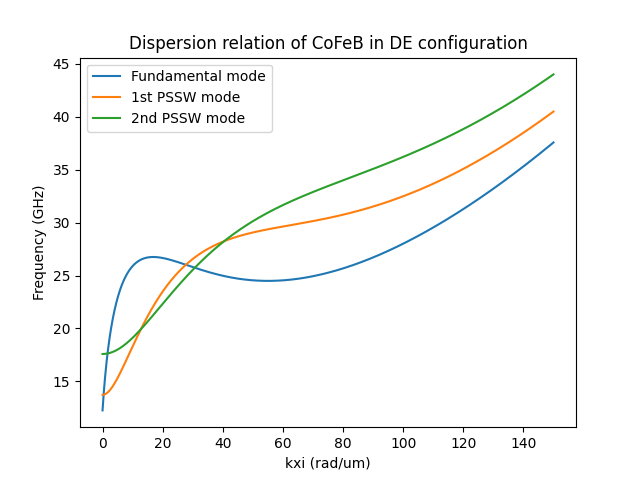

In [5]:
plt.figure()
plt.plot(kxi*1e-6, w00, kxi*1e-6, w11, kxi*1e-6, w22);
plt.xlabel('kxi (rad/um)');
plt.ylabel('Frequency (GHz)');
plt.legend(['Fundamental mode', '1st PSSW mode', '2nd PSSW mode'])
plt.title('Dispersion relation of CoFeB in DE configuration')
plt.show()

## 2nd perturbation for the crossing between the fundamental and 2nd PSSW mode

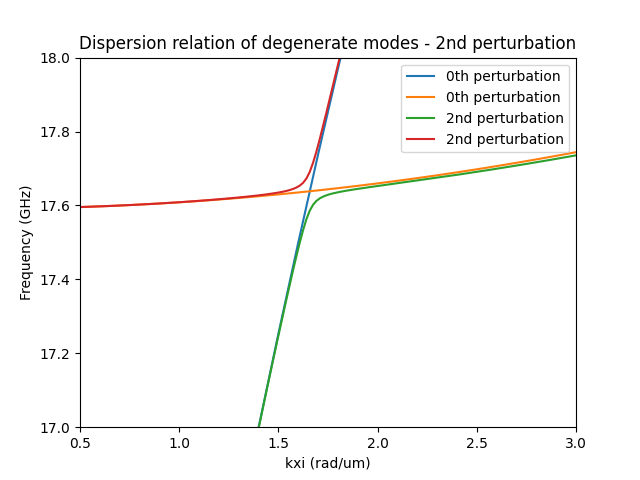

In [6]:
kCrossing = np.linspace(0.5e6, 3e6, 150)

DECoFeBDeg = SWT.DispersionCharacteristic(kxi = kCrossing, theta = np.pi/2, phi = np.deg2rad(90), d = 100e-9, boundaryCond = 1, Bext = 0.1, material = SWT.CoFeB)

[wd02, wd20] =  [w*1e-9/(2*np.pi) for w in DECoFeBDeg.GetSecondPerturbation(n=0, nc=2)]

plt.figure()
plt.plot(kxi*1e-6, w00, kxi*1e-6, w22, kCrossing*1e-6, wd02, kCrossing*1e-6, wd20);
plt.xlabel('kxi (rad/um)');
plt.ylabel('Frequency (GHz)');
plt.legend(['0th perturbation', '0th perturbation', '2nd perturbation', '2nd perturbation'])
plt.title('Dispersion relation of degenerate modes - 2nd perturbation')
plt.xlim([min(kCrossing*1e-6), max(kCrossing*1e-6)])
plt.ylim([17, 18])
plt.show()

# Numerical calculation according to theory of Tachci
This approach calculates the dispersion in all regions accuratelly according to DOI: 10.1103/PhysRevB.100.104406

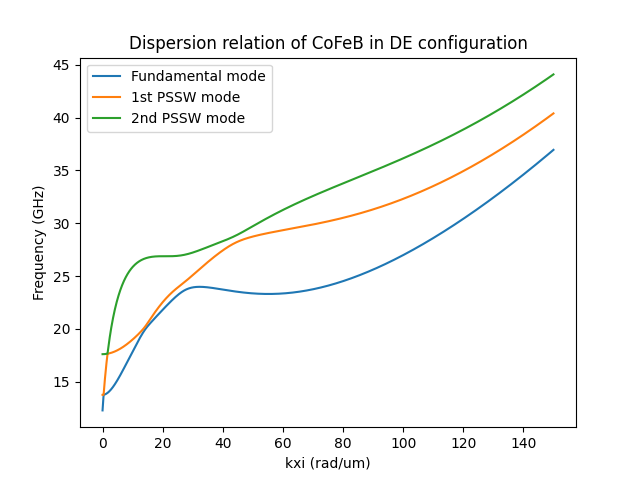

In [9]:
wTa = DECoFeB.GetDispersionTacchi()*1e-9/(2*np.pi) #First three modes

plt.figure()
plt.plot(kxi*1e-6, wTa[3], kxi*1e-6, wTa[4], kxi*1e-6, wTa[5]);
plt.xlabel('kxi (rad/um)');
plt.ylabel('Frequency (GHz)');
plt.legend(['Fundamental mode', '1st PSSW mode', '2nd PSSW mode'])
plt.title('Dispersion relation of CoFeB in DE configuration')
plt.show()

# Calculation of other dispersive characteristics

In [15]:
vg00 = DECoFeB.GetGroupVelocity(n=0)*1e-3 # um/ns
tau00 = DECoFeB.GetLifetime(n=0)*1e9 #ns
propLen00 = DECoFeB.GetPropLen(n=0)*1e6 #um

vg11 = DECoFeB.GetGroupVelocity(n=1)*1e-3 # um/ns
tau11 = DECoFeB.GetLifetime(n=1)*1e9 #ns
propLen11 = DECoFeB.GetPropLen(n=1)*1e6 #um

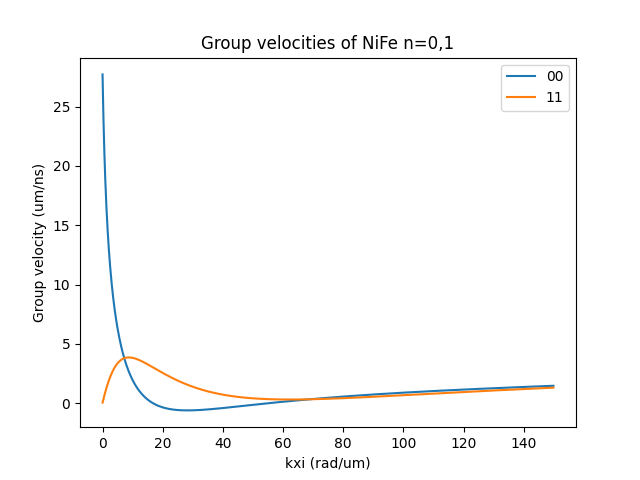

In [17]:
plt.figure()
plt.plot(kxi[0:-1]*1e-6, vg00, kxi[0:-1]*1e-6, vg11);
plt.xlabel('kxi (rad/um)');
plt.ylabel('Group velocity (um/ns)');
plt.legend(['00', '11'])
plt.title('Group velocities of CoFeB n=0,1')
plt.show()

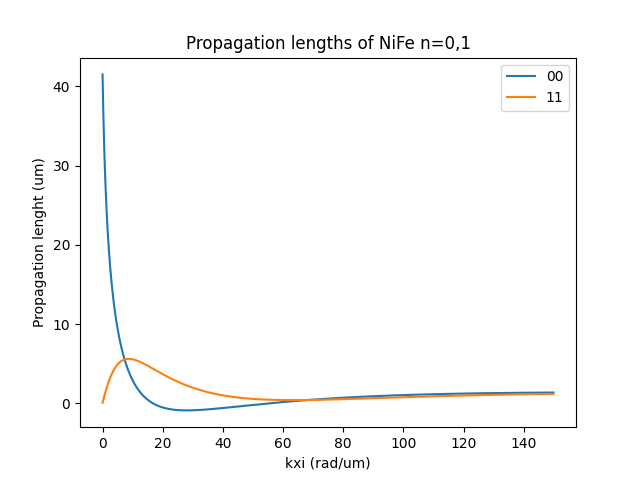

In [18]:
plt.figure()
plt.plot(kxi[0:-1]*1e-6, propLen00, kxi[0:-1]*1e-6, propLen11);
plt.xlabel('kxi (rad/um)');
plt.ylabel('Decay lenght (um)');
plt.legend(['00', '11'])
plt.title('Decay lengths of CoFeB n=0,1')
plt.show()

Text(0.5, 1.0, 'Lifetime of CoFeB n=0,1')

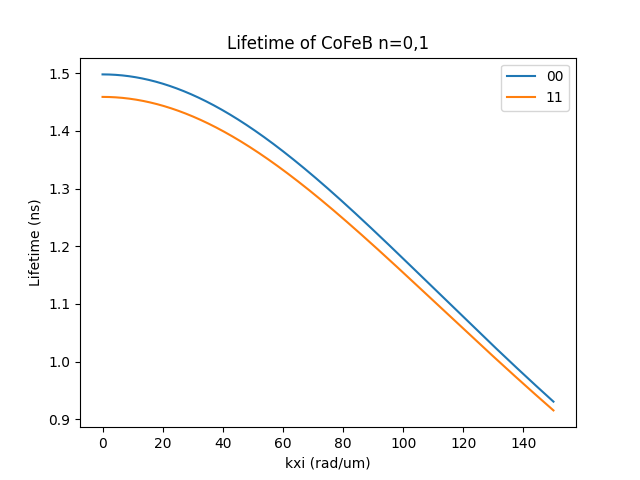

In [26]:
plt.figure()
plt.plot(kxi*1e-6, tau00, kxi*1e-6, tau11)
plt.xlabel('kxi (rad/um)');
plt.ylabel('Lifetime (ns)');
plt.legend(['00', '11'])
plt.title('Lifetime of CoFeB n=0,1')